In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train = tf.reshape(x_train, (-1, 3072))
x_test  = tf.reshape(x_test, (-1, 3072))

# data normalization
x_train = x_train/127.5 - 1.0
x_test  = x_test/127.5 - 1.0

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(50000, 3072)
(10000, 3072)
(50000, 1)
(10000, 1)


In [2]:
# set seed
tf.random.set_seed(1234)

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(3072,)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [3]:
# optimizer and loss
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(x_train, y_train, batch_size=256,
                    validation_data=(x_test, y_test),
                    epochs=150, verbose=2)

Epoch 1/150
196/196 - 4s - loss: 1.6611 - sparse_categorical_accuracy: 0.4163 - val_loss: 1.5084 - val_sparse_categorical_accuracy: 0.4707 - 4s/epoch - 22ms/step
Epoch 2/150
196/196 - 3s - loss: 1.4302 - sparse_categorical_accuracy: 0.4981 - val_loss: 1.4498 - val_sparse_categorical_accuracy: 0.4854 - 3s/epoch - 17ms/step
Epoch 3/150
196/196 - 3s - loss: 1.3087 - sparse_categorical_accuracy: 0.5438 - val_loss: 1.3967 - val_sparse_categorical_accuracy: 0.5150 - 3s/epoch - 17ms/step
Epoch 4/150
196/196 - 3s - loss: 1.2166 - sparse_categorical_accuracy: 0.5737 - val_loss: 1.3995 - val_sparse_categorical_accuracy: 0.5159 - 3s/epoch - 16ms/step
Epoch 5/150
196/196 - 3s - loss: 1.1417 - sparse_categorical_accuracy: 0.6003 - val_loss: 1.3620 - val_sparse_categorical_accuracy: 0.5258 - 3s/epoch - 16ms/step
Epoch 6/150
196/196 - 3s - loss: 1.0626 - sparse_categorical_accuracy: 0.6291 - val_loss: 1.3766 - val_sparse_categorical_accuracy: 0.5327 - 3s/epoch - 16ms/step
Epoch 7/150
196/196 - 3s - l

Epoch 52/150
196/196 - 3s - loss: 0.1166 - sparse_categorical_accuracy: 0.9618 - val_loss: 4.3033 - val_sparse_categorical_accuracy: 0.5170 - 3s/epoch - 17ms/step
Epoch 53/150
196/196 - 3s - loss: 0.1198 - sparse_categorical_accuracy: 0.9592 - val_loss: 4.3715 - val_sparse_categorical_accuracy: 0.5203 - 3s/epoch - 15ms/step
Epoch 54/150
196/196 - 3s - loss: 0.0969 - sparse_categorical_accuracy: 0.9669 - val_loss: 4.3664 - val_sparse_categorical_accuracy: 0.5243 - 3s/epoch - 16ms/step
Epoch 55/150
196/196 - 3s - loss: 0.0728 - sparse_categorical_accuracy: 0.9752 - val_loss: 4.4638 - val_sparse_categorical_accuracy: 0.5183 - 3s/epoch - 16ms/step
Epoch 56/150
196/196 - 3s - loss: 0.0709 - sparse_categorical_accuracy: 0.9761 - val_loss: 4.5797 - val_sparse_categorical_accuracy: 0.5207 - 3s/epoch - 15ms/step
Epoch 57/150
196/196 - 3s - loss: 0.0841 - sparse_categorical_accuracy: 0.9721 - val_loss: 4.6151 - val_sparse_categorical_accuracy: 0.5138 - 3s/epoch - 17ms/step
Epoch 58/150
196/196 -

Epoch 103/150
196/196 - 3s - loss: 0.0612 - sparse_categorical_accuracy: 0.9807 - val_loss: 6.3062 - val_sparse_categorical_accuracy: 0.5173 - 3s/epoch - 14ms/step
Epoch 104/150
196/196 - 3s - loss: 0.0856 - sparse_categorical_accuracy: 0.9724 - val_loss: 6.2805 - val_sparse_categorical_accuracy: 0.5155 - 3s/epoch - 14ms/step
Epoch 105/150
196/196 - 3s - loss: 0.0635 - sparse_categorical_accuracy: 0.9799 - val_loss: 6.3715 - val_sparse_categorical_accuracy: 0.5093 - 3s/epoch - 14ms/step
Epoch 106/150
196/196 - 3s - loss: 0.0472 - sparse_categorical_accuracy: 0.9855 - val_loss: 6.4120 - val_sparse_categorical_accuracy: 0.5140 - 3s/epoch - 13ms/step
Epoch 107/150
196/196 - 3s - loss: 0.0764 - sparse_categorical_accuracy: 0.9772 - val_loss: 6.4109 - val_sparse_categorical_accuracy: 0.5167 - 3s/epoch - 13ms/step
Epoch 108/150
196/196 - 3s - loss: 0.0687 - sparse_categorical_accuracy: 0.9782 - val_loss: 6.3518 - val_sparse_categorical_accuracy: 0.5141 - 3s/epoch - 14ms/step
Epoch 109/150
19

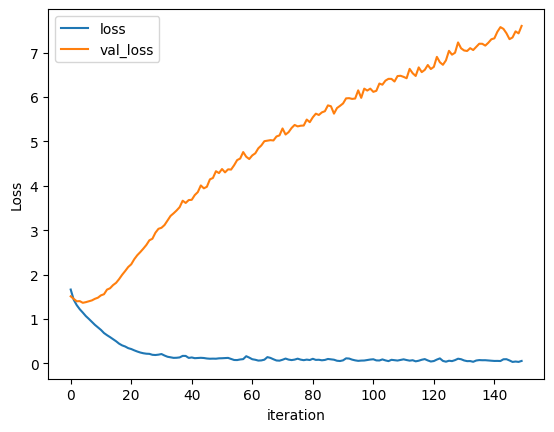

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

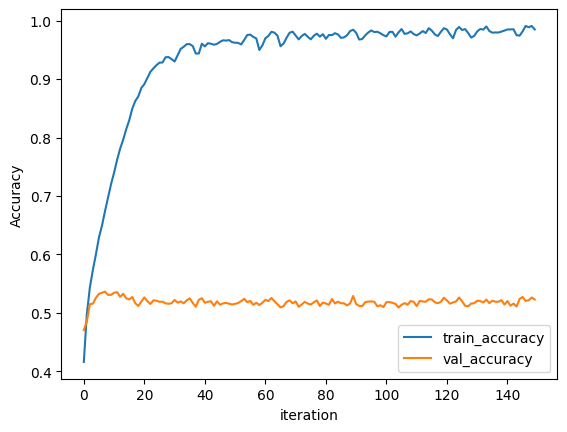

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [6]:
import matplotlib.pyplot as plt
%matplotlib qt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()